In [42]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

print("Done")


Done


In [43]:
#loading data
path = "C:\\Users\\Aman\\Desktop\\OtherFolders\\Sem7\\Topics Of Study\\Kaggle\\House Price Prediction\\Data"


train = pd.read_csv(path+"\\train.csv")
test = pd.read_csv(path+"\\test.csv")

#print(train.head())
#print(test.head())

print("train file shape : "+str(train.shape))
print("test file shape : "+str(test.shape))


train file shape : (1460, 81)
test file shape : (1459, 80)


In [44]:
#print(len(train.columns))
#print(train[train.columns[0]].describe())
#print(train.columns)
#print(train['MSSubClass'])
"""
for col in train.columns:
    train[col].describe()
    print("\n\n")
    
""" 
for col in train.columns:
    print(col+"-------->>")
    print(train[col].describe())

    print("\n\n\n")

Id-------->>
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64




MSSubClass-------->>
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64




MSZoning-------->>
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object




LotFrontage-------->>
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%              NaN
50%              NaN
75%              NaN
max       313.000000
Name: LotFrontage, dtype: float64




LotArea-------->>
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype:

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64




Functional-------->>
count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object




Fireplaces-------->>
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64




FireplaceQu-------->>
count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object




GarageType-------->>
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object




GarageYrBlt-------->>
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%              NaN
50%              NaN
75%              NaN
max      2010.000000
Name: GarageYrBlt, d

In [45]:
#printing skewness
print(train[train.columns[len(train.columns)-1]].skew())

1.88287575977


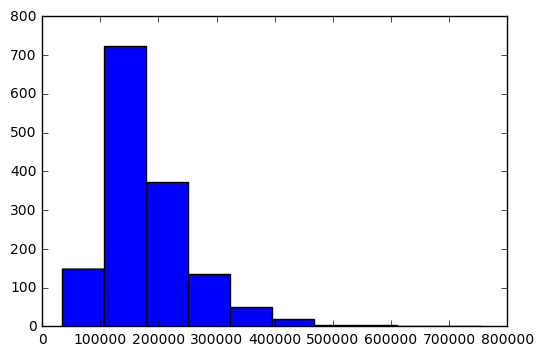

In [46]:
#plotting the sales price


plt.hist(train[train.columns[len(train.columns)-1]],color='blue')
plt.show()

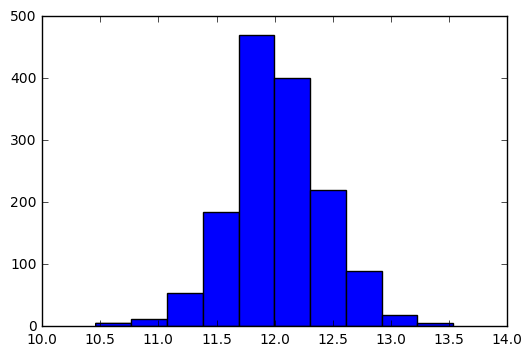

In [47]:
#transforming the target variable using log tranformation
target = np.log(train[train.columns[len(train.columns)-1]])
plt.hist(target,color='blue')
plt.show()

In [48]:
#selecting the numeric features
num_features = train.select_dtypes(include=[np.number])
print(num_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [49]:
#finding correlation between features and target

corr = num_features.corr()

#print(corr)
#print(type(corr))
#print(corr.columns)
#print(len(corr.columns))

corr_all_vs_saleprice = corr[corr.columns[-1]].sort_values(ascending=False)
##obtaining first 5
print(corr_all_vs_saleprice.head())

#or
print(corr_all_vs_saleprice[:5])


##obtaining last 5
print(corr_all_vs_saleprice.tail())

#or

print(corr_all_vs_saleprice[-5:])


##obtining all
#print(corr_all_vs_saleprice)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [50]:
##OverallQual.unique()

#print(train.OverallQual)
#print(type(train.OverallQual))
#print(train.OverallQual.unique())

In [51]:
##quality pivot table
quality_pivot = train.pivot_table(index='OverallQual',values="SalePrice",aggfunc=np.median)
print(quality_pivot)

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64


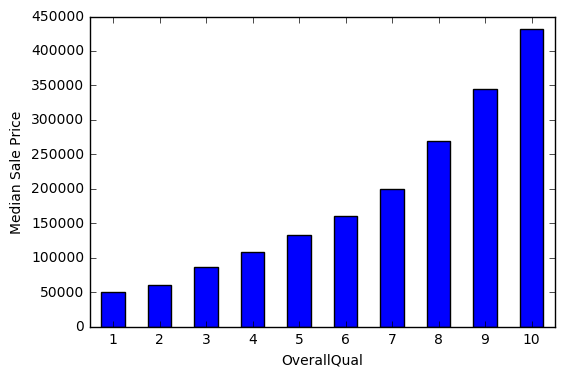

In [52]:
##Plotting the quality pivot table
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel("OverallQual")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

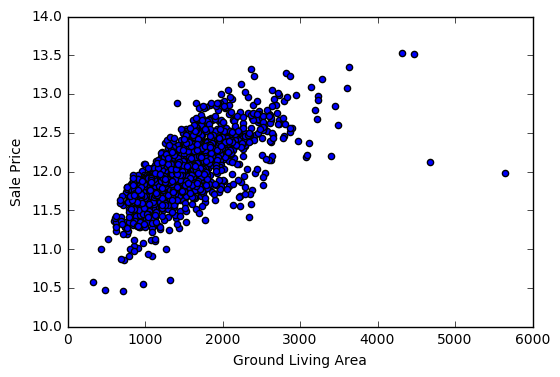

In [53]:
#Relationship between ground living area and sales price
plt.scatter(x=train['GrLivArea'],y=target)
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

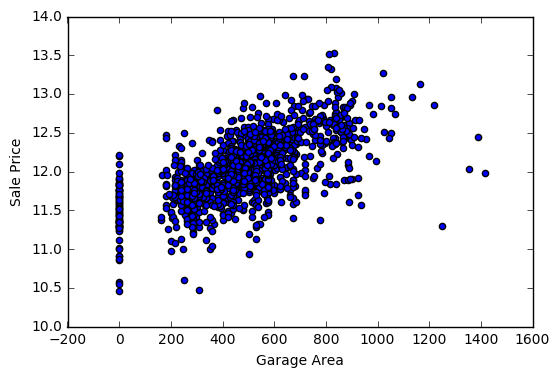

In [54]:
#Relationship between Garage area and sale price
plt.scatter(x=train['GarageArea'],y=target)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.show()

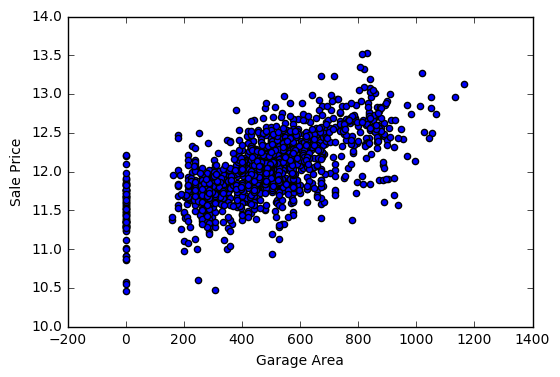

In [55]:
##Removing outlier - removing houses with garage area greater than 1200

train = train[train['GarageArea']<1200]

##again plotting
plt.scatter(x=train['GarageArea'],y=np.log(train['SalePrice']))
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.show()

In [56]:
##Handling the null Values

#print(train2.isnull().sum())
#print(type(train2.isnull().sum()))
#print(train2.isnull().sum().sort_values(ascending=False))

null_count = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null_count.columns = ['Null_count']
null_count.index.name = 'Features'
print(null_count[null_count['Null_count']>0])

              Null_count
Features                
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1


In [57]:
##finding the unique value of column - using  Series.unique() method
unique = train['MiscFeature'].unique()
print(unique)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [58]:
## Dealing with the non-numeric data
categorical = train.select_dtypes(exclude=[np.number])

print(categorical.describe())


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

In [59]:
##checking the category of street categorical data
#print(categorical.columns)
print(categorical['Street'].value_counts())

Pave    1450
Grvl       5
Name: Street, dtype: int64


In [60]:
##using one hot encoding technique to transform categrical data to numerical data

#type(pd.get_dummies(train['Street']))

##this will no run now because we have rmoved the categorical data
train['enc_street'] = pd.get_dummies(train['Street'],drop_first=True)
test['enc_street'] = pd.get_dummies(train['Street'],drop_first=True)

print(train['enc_street'].value_counts())

print("Done")

1.0    1450
0.0       5
Name: enc_street, dtype: int64
Done


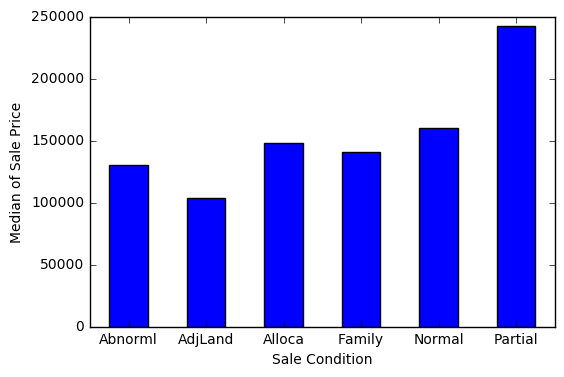

In [61]:
##Creating pivot table for SaleCondition and plotting
saleCondition_pivot = train.pivot_table(index="SaleCondition",values="SalePrice",aggfunc=np.median)
saleCondition_pivot.plot(kind='bar',color='blue')
plt.xlabel("Sale Condition")
plt.ylabel("Median of Sale Price")
plt.xticks(rotation=0)
plt.show()

In [62]:
print(train['SaleCondition'].value_counts())

Normal     1196
Partial     122
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


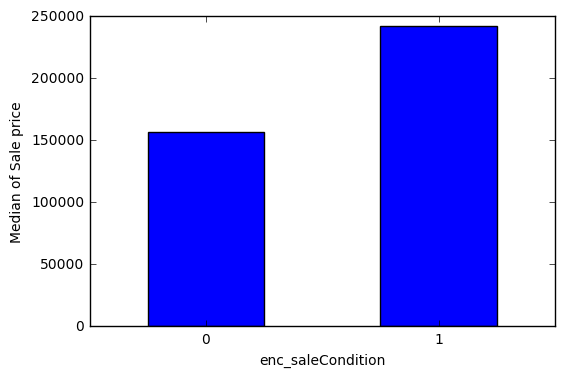

In [63]:
def encode_feature(x): return 1 if x=="Partial" else 0

train['enc_saleCondition'] = train['SaleCondition'].apply(encode_feature)
#print(train['enc_saleCondition'].value_counts())
enc_saleCondition_pivot = train.pivot_table(index='enc_saleCondition',values='SalePrice',aggfunc=np.median)
enc_saleCondition_pivot.plot(kind='bar',color='blue')
plt.xlabel('enc_saleCondition')
plt.ylabel('Median of Sale price')
plt.xticks(rotation=0)
plt.show()

In [64]:
##interpolating the missing values

data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(data.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1        ...          EnclosedPorch  \
0          2003       196.0         706        ...                      0   
1          1976         0.0         978        ...                      0   
2          2002       162.0         486        ...                      0   
3          1970         0.0         216        ...                    272   
4          2000       350.0         655        ...                      0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Yr

## Building the linear model


> first seperate the feature and target variable
> split the data into test and train set
> begin model i.e. create the linear model
> fit the data to model
> evaluating the model and visualizing the result
    >r-squared evaluation using score() of model
    >rmse evaluation using predict() of model and then using mean_squared_error()  


        

In [65]:
##removing the non-numeric data from train data
train = train.select_dtypes(include=[np.number])
#print(train)

##Interpolating the data
train = train.select_dtypes(include=[np.number]).interpolate().dropna()

r-squared error : 0.888247770926
Mean Squared Error : 0.0178417945196


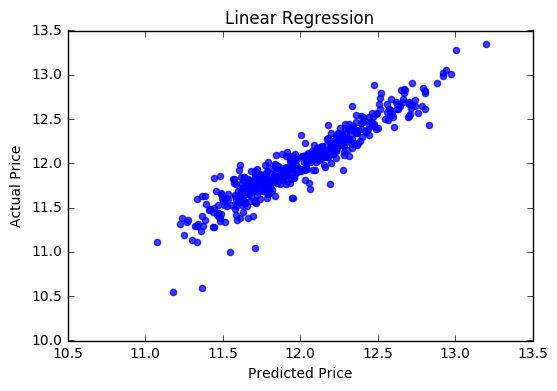

Done


In [66]:
## Building a linear model
"""
separate the
#removing the non-numeric data from train data
train = train.select_dtypes(include=[np.number]) feature and target variable 
"""
#splitting the feartures and target variable
y = np.log(train["SalePrice"])
X = train.drop(["Id","SalePrice"],axis=1)

#print(y.head())
#print(X.head())

#splitting the test and target data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=.33)

#creating the linear model
lr = linear_model.LinearRegression()    #returns linearRegression algo

#fitting the training data 
model = lr.fit(X_train,y_train)         #fitting the data to algo, return model(algo trained with data)


##evaluate the model 

#by default the score method uses r-squared error
score = model.score(X_test,y_test)
print('r-squared error : '+str(score))

#using predict() and then using the mean_squared_error
prediction = model.predict(X_test)

error = mean_squared_error(prediction, y_test)
print("Mean Squared Error : "+str(error))

#relationship between predicted values and actual values

plt.scatter(prediction,y_test,alpha=.75,color='blue')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.xticks(rotation=0)
plt.title("Linear Regression")
plt.show()


print("Done")


## Try to improve the model

> parameter alpha control the strength of regularizatio


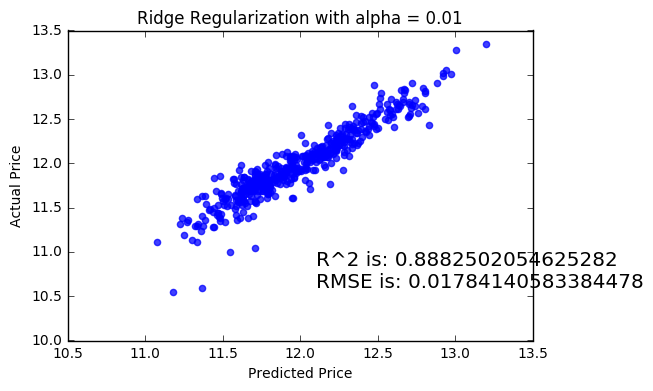

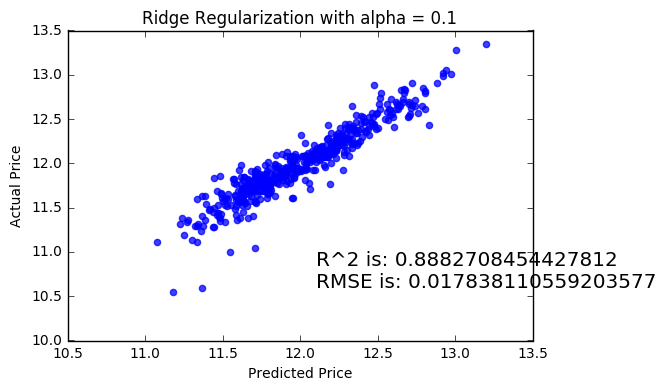

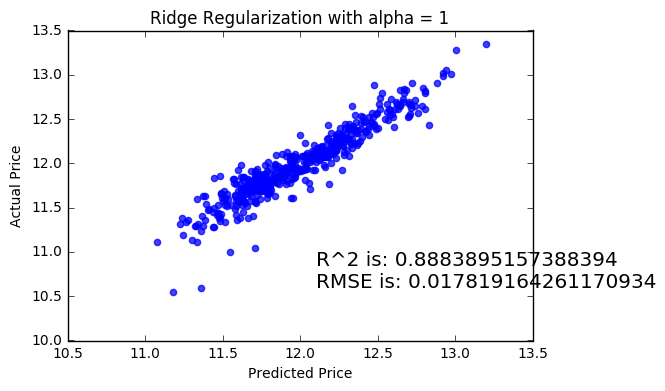

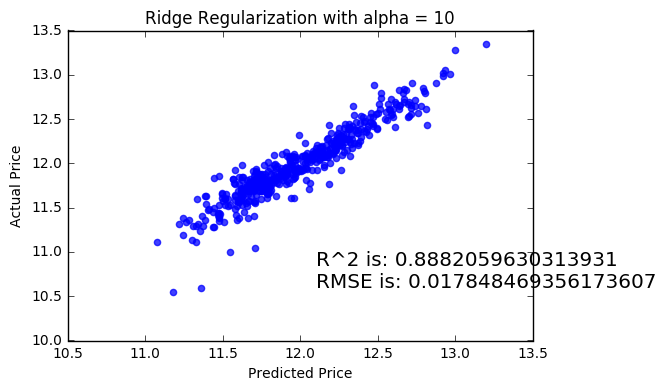

In [ ]:
for i in range(-2,3):
    alpha = 10**i
    rlr = linear_model.Ridge(alpha=alpha)
    model_ridge = rlr.fit(X_train,y_train)
    prediction_r = model_ridge.predict(X_test)
    
    plt.scatter(prediction_r,y_test,alpha=.75,color='blue')
    plt.xlabel('Predicted Price')
    plt.ylabel("Actual Price")
    plt.xticks(rotation=0)
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    model_ridge.score(X_test, y_test),
                    mean_squared_error(y_test, prediction_r))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

